In [ ]:
!pip install wordcloud

In [ ]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist
from nltk import wordnet

import matplotlib.pyplot as plt

In [ ]:
# Load in the dataframe
df = pd.read_csv("covid19.csv")

In [ ]:
# Looking at first 5 rows of the dataset
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,url
0,vho70jcx,f056da9c64fbf00a4645ae326e8a4339d015d155,biorxiv,SIANN: Strain Identification by Alignment to N...,10.1101/001727,NaN,NaN,biorxiv,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/001727
1,i9tbix2v,daf32e013d325a6feb80e83d15aabc64a48fae33,biorxiv,Spatial epidemiology of networked metapopulati...,10.1101/003889,NaN,NaN,biorxiv,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/003889
2,62gfisc6,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,biorxiv,Sequencing of the human IG light chain loci fr...,10.1101/006866,NaN,NaN,biorxiv,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/006866
3,058r9486,4da8a87e614373d56070ed272487451266dce919,biorxiv,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,NaN,NaN,biorxiv,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/007476
4,wich35l7,eccef80cfbe078235df22398f195d5db462d8000,biorxiv,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,NaN,NaN,biorxiv,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/010389


In [ ]:
df[["title", "abstract","publish_time"]].head()

,title,abstract,publish_time
0,SIANN: Strain Identification by Alignment to N...,Next-generation sequencing is increasingly bei...,2014-01-10
1,Spatial epidemiology of networked metapopulati...,An emerging disease is one infectious epidemic...,2014-06-04
2,Sequencing of the human IG light chain loci fr...,Germline variation at immunoglobulin gene (IG)...,2014-07-03
3,Bayesian mixture analysis for metagenomic comm...,Deep sequencing of clinical samples is now an ...,2014-07-25
4,Mapping a viral phylogeny onto outbreak trees ...,Developing methods to reconstruct transmission...,2014-11-11


In [ ]:
# Groupby by source
source_x = df.groupby("source_x")

# Summary statistic of all sources
source_x.describe().head()

pubmed_id                                                       \
             count          mean           std         min          25%   
source_x                                                                  
CZI          103.0  3.204885e+07  2.015423e+05  30531947.0  32038939.00   
Elsevier   10403.0  1.997467e+07  8.105312e+06      3506.0  15808750.50   
PMC        23737.0  2.284725e+07  7.202248e+06      2142.0  19244315.00   
WHO          398.0  3.202960e+07  6.734889e+05  23075143.0  32061199.25   
biorxiv        0.0           NaN           NaN         NaN          NaN   

                                              Microsoft Academic Paper ID  \
                 50%          75%         max                       count   
source_x                                                                    
CZI       32097202.0  32118645.50  32190785.0                       155.0   
Elsevier  20510699.0  26431849.00  32145848.0                       260.0   
PMC       24351799.0  28397519.00  32206449.0                        46.0   
WHO       32107910.5  32134355.25  32179910.0                       503.0   
biorxiv          NaN          NaN         NaN                         0.0   

                                                                               \
                  mean           std          min           25%           50%   
source_x                                                                        
CZI       2.791510e+09  4.366797e+08  177663115.0  2.805167e+09  3.003886e+09   
Elsevier  2.735610e+09  4.642498e+08  167054977.0  2.589654e+09  3.003731e+09   
PMC       2.695274e+09  5.536979e+08  119142419.0  2.369416e+09  3.003369e+09   
WHO       2.672835e+09  4.983483e+08   39126301.0  2.324656e+09  3.001119e+09   
biorxiv            NaN           NaN          NaN           NaN           NaN   

                                      
                   75%           max  
source_x                              
CZI       3.005657e+09  3.006672e+09  
Elsevier  3.005695e+09  3.006659e+09  
PMC       3.005035e+09  3.006649e+09  
WHO       3.005507e+09  3.006672e+09  
biorxiv            NaN           NaN

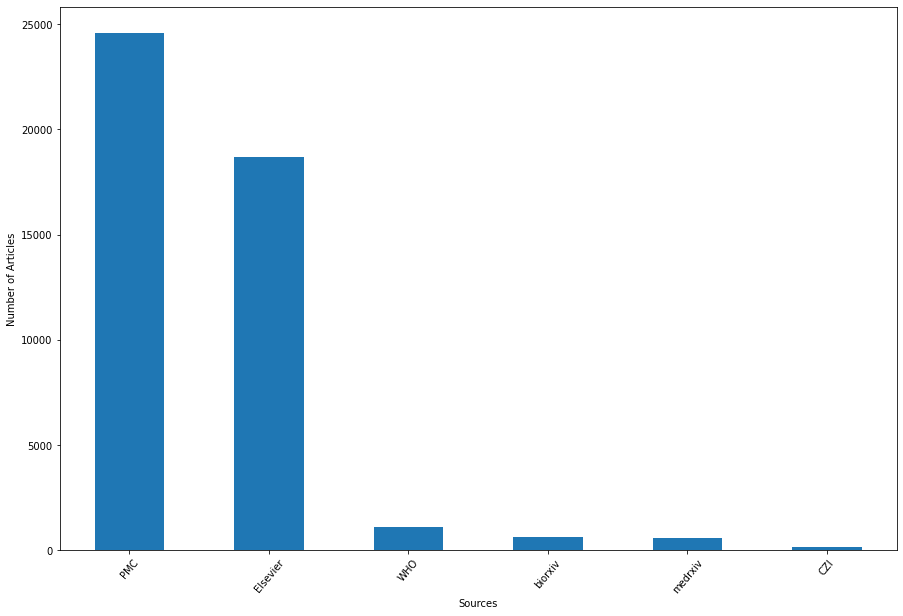

In [ ]:
plt.figure(figsize=(15,10))
source_x.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Sources")
plt.ylabel("Number of Articles")
plt.show()

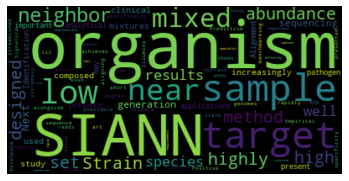

In [ ]:
# Start with one review:
text = df.abstract[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Save the image in the img folder:
wordcloud.to_file("covid19.png")

In [ ]:

df['abstract'] = df['abstract'].astype(str)
text = " ".join(review for review in df.abstract)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 51835076 words in the combination of all review.


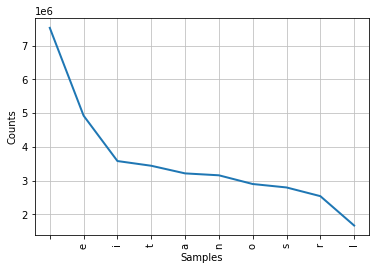

In [ ]:
freq = FreqDist(text)
freq.plot(10)

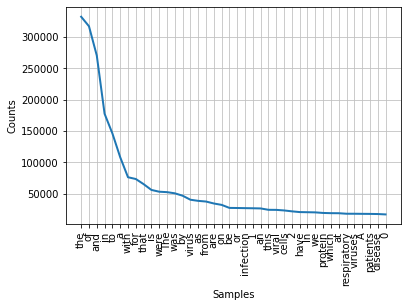

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)
freq = FreqDist(tokens)
freq.plot(40)


In [ ]:
freq.most_common(100)

[('the', 332390),
 ('of', 317199),
 ('and', 270537),
 ('in', 177501),
 ('to', 146183),
 ('a', 108164),
 ('with', 76147),
 ('for', 73320),
 ('that', 65136),
 ('is', 55896),
 ('were', 53033),
 ('The', 52338),
 ('was', 50477),
 ('by', 46636),
 ('virus', 40225),
 ('as', 38416),
 ('from', 37344),
 ('are', 34234),
 ('on', 31999),
 ('be', 27181),
 ('or', 27017),
 ('infection', 26796),
 ('1', 26607),
 ('an', 26341),
 ('this', 24138),
 ('viral', 24039),
 ('cells', 23133),
 ('2', 21704),
 ('have', 20514),
 ('In', 20294),
 ('we', 20049),
 ('protein', 19122),
 ('which', 18779),
 ('at', 18686),
 ('respiratory', 17863),
 ('viruses', 17848),
 ('A', 17703),
 ('patients', 17597),
 ('disease', 17391),
 ('0', 16782),
 ('study', 16703),
 ('We', 16689),
 ('not', 16657),
 ('cell', 16344),
 ('3', 15467),
 ('has', 15321),
 ('human', 14554),
 ('these', 14514),
 ('been', 14333),
 ('RNA', 13678),
 ('SARS', 13654),
 ('CoV', 13099),
 ('This', 12882),
 ('can', 12566),
 ('also', 12420),
 ('influenza', 12233),
 ('bet

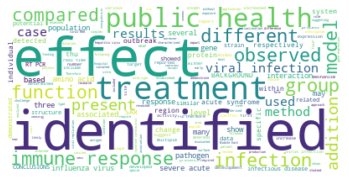

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["cells", "protein","respiratory","viruses","patients","disease","study","cell","human","found","Abstract","CoV","method","result","well","conclusion","one","two","including","use","using","Although","nan"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
covid19_mask = np.array(Image.open("ncov.jpeg"))
covid19_mask=covid19_mask[:,:,0]
covid19_mask


array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254]], dtype=uint8)

In [ ]:
def transform_format(val):
    if val == 254:
        return 255
    else:
        return val

In [ ]:
# Transform your mask into a new one that will work with the function:
transformed_covid19_mask = np.ndarray((covid19_mask.shape[0],covid19_mask.shape[1]), np.int32)

for i in range(len(covid19_mask)):
    transformed_covid19_mask[i] = list(map(transform_format, covid19_mask[i]))

In [ ]:
# Check the expected result of your mask
transformed_covid19_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

In [ ]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_covid19_mask,
               stopwords=stopwords, contour_width=1, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("covidnew.png")

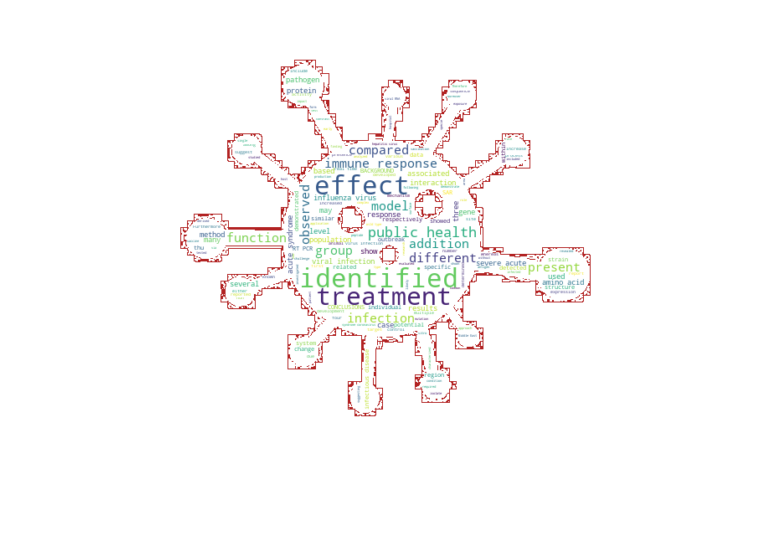

In [ ]:
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()